In [27]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [28]:
train=pd.read_csv('data/SeatleWeather.csv')

In [29]:
train.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
DATE    25551 non-null object
PRCP    25548 non-null float64
TMAX    25551 non-null int64
TMIN    25551 non-null int64
RAIN    25548 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [31]:
train.describe()

,PRCP,TMAX,TMIN
count,25548.000000,25551.000000,25551.000000
mean,0.106222,59.544206,44.514226
std,0.239031,12.772984,8.892836
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


In [32]:
train.shape

(25551, 5)

In [33]:
#Handling missing data

In [34]:
train.RAIN.value_counts()

False    14648
True     10900
Name: RAIN, dtype: int64

In [35]:
train['RAIN']=train.RAIN.map({False:0,True:1})

In [36]:
train.RAIN=train['RAIN'].fillna(0.0)

In [37]:
train.RAIN.value_counts()

0.0    14651
1.0    10900
Name: RAIN, dtype: int64

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
DATE    25551 non-null object
PRCP    25548 non-null float64
TMAX    25551 non-null int64
TMIN    25551 non-null int64
RAIN    25551 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 998.2+ KB


In [39]:
std_prcp=train.PRCP.std()

In [40]:
std_prcp

0.2390314590314671

In [41]:
train.PRCP=train.PRCP.fillna(std_prcp)

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
DATE    25551 non-null object
PRCP    25551 non-null float64
TMAX    25551 non-null int64
TMIN    25551 non-null int64
RAIN    25551 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 998.2+ KB


In [43]:
train['RAIN']=train['RAIN'].astype(int)

In [44]:
train.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,1
1,1948-01-02,0.59,45,36,1
2,1948-01-03,0.42,45,35,1
3,1948-01-04,0.31,45,34,1
4,1948-01-05,0.17,45,32,1


In [45]:
labelencoder=LabelEncoder()

In [46]:
train['RAIN']=labelencoder.fit_transform(train['RAIN'])

In [48]:
train['month'] = pd.DatetimeIndex(train['DATE']).month

In [53]:
train['day']=pd.DatetimeIndex(train['DATE']).day

In [54]:
train.head()

,DATE,PRCP,TMAX,TMIN,RAIN,month,day
0,1948-01-01,0.47,51,42,1,1,1
1,1948-01-02,0.59,45,36,1,1,2
2,1948-01-03,0.42,45,35,1,1,3
3,1948-01-04,0.31,45,34,1,1,4
4,1948-01-05,0.17,45,32,1,1,5


In [55]:
train.corr()

,PRCP,TMAX,TMIN,RAIN,month,day
PRCP,1.000000,-0.226673,-0.064309,0.515072,0.014926,-0.001431
TMAX,-0.226673,1.000000,0.860684,-0.389287,0.154979,0.001598
TMIN,-0.064309,0.860684,1.000000,-0.139975,0.222508,0.003056
RAIN,0.515072,-0.389287,-0.139975,1.000000,-0.046057,-0.003005
month,0.014926,0.154979,0.222508,-0.046057,1.000000,0.009622
day,-0.001431,0.001598,0.003056,-0.003005,0.009622,1.000000


In [57]:
rain=train[train['RAIN']==1]
norain=train[train['RAIN']==0]

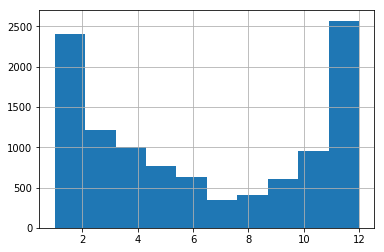

In [60]:
rain['month'].hist()

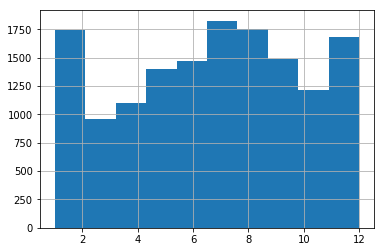

In [61]:
norain['month'].hist()

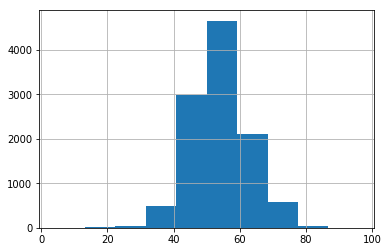

In [62]:
rain['TMAX'].hist()

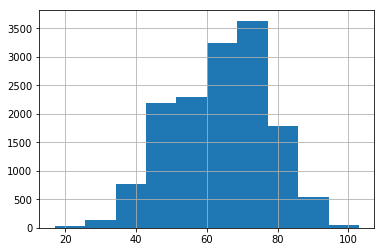

In [64]:
norain['TMAX'].hist()